🧠 Qiskit Fall Fest 2025 – Workshop 3: Quantum Algorithms in Action

Presented by: Asfand Yar – Lead Organizer & Instructor of Quantum Computing, University of Debrecen

⚙️ Classical vs Quantum Search

In this section, we will explore how quantum algorithms outperform classical search methods by leveraging superposition and interference.
Through this hands-on exercise, participants will:

Compare classical brute-force search with quantum search.

Understand how Grover’s Algorithm accelerates the search process.

Simulate and visualize both approaches using Qiskit 2 simulators.


## Part 1: Classical Brute-Force Search



🔹Before diving into quantum algorithms, let’s begin with a classical perspective.
Here we define a list of numbers and create a simple function that searches for a hidden target value by checking each element one by one.

This represents how a classical computer solves a search problem — sequentially and deterministically, examining each possibility until the correct answer is found.

In [ ]:
# Classical Search
myList = [5, 4, 6, 9, 1, 2, 5, 8, 0]

In [ ]:
def oracle(number):
    winning_num = 8
    return number == winning_num

In [ ]:
for index, number in enumerate(myList):
    if oracle(number):
        print(f"Winning number found at index {index}")
        print(f"Execution count: {index + 1}")
        break

Winning number found at index 7
Execution count: 8


✅ As you can see, we need to check multiple elements before finding the right one.

## Why Quantum Search?

⚛️ From Classical to Quantum Search

In a classical search, finding a specific item among N possibilities requires examining each one — an O(N) process.

By contrast, Grover’s Algorithm uses quantum superposition and amplitude amplification to identify the correct solution in only about O(√N) steps.

This remarkable speed-up arises from quantum interference, allowing the algorithm to amplify the probability of the correct answer while suppressing all others.

Let’s now explore the quantum version of this search problem using Qiskit.

In [ ]:
!pip install qiskit==1.2.4 qiskit-aer==0.15.1 qiskit-machine-learning==0.8.0 matplotlib seaborn pylatexenc


## Grover's Algorithm

🧩 Step 1 – Defining the Oracle Circuit

In Grover’s Algorithm, the oracle is a special quantum circuit that marks the correct answer by flipping its phase.
For this demonstration, our oracle identifies the target state |11⟩ and inverts its phase — effectively tagging it as the solution.

This phase inversion is what allows Grover’s algorithm to later amplify the probability of the marked state during the diffusion step.

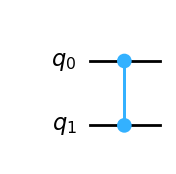

In [ ]:
# from qiskit import QuantumCircuit,Aer,execute
from qiskit import *
from qiskit.visualization import plot_histogram
%matplotlib inline
oracleCircuit = QuantumCircuit(2, name="oracleCircuit")
oracleCircuit.cz(0, 1)
oracleCircuit.to_gate()
oracleCircuit.draw(output='mpl',style="iqp")

## 🌐 Step 2 – Initialize the Main Circuit with Superposition

To begin the quantum search, we initialize all qubits in a uniform superposition of states.
This ensures that every possible solution is explored simultaneously — the key advantage of quantum parallelism.

Applying Hadamard gates to each qubit prepares this balanced superposition, setting the stage for the oracle and diffusion steps that follow.

/usr/local/lib/python3.12/dist-packages/qiskit/visualization/circuit/matplotlib.py:269: UserWarning: Style JSON file 'iqx.json' not found in any of these locations: /usr/local/lib/python3.12/dist-packages/qiskit/visualization/circuit/styles/iqx.json, iqx.json. Will use default style.
  self._style, def_font_ratio = load_style(self._style)


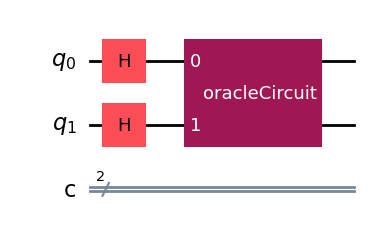

In [ ]:
mainCircuit = QuantumCircuit(2, 2)
mainCircuit.h([0, 1])
mainCircuit.append(oracleCircuit, [0, 1])
mainCircuit.draw(output='mpl',style="iqx")

## 🔄 Step 3 – Apply the Reflection Circuit (Inversion About the Mean)

The reflection circuit, also known as inversion about the mean, amplifies the probability of measuring the correct state.
After the oracle marks the target state, this step reflects all amplitudes around their average value —
making the marked state’s amplitude grow larger while others shrink.

This process of marking and reflecting lies at the heart of Grover’s amplitude amplification.


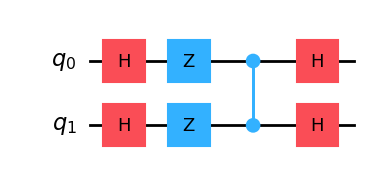

In [ ]:
reflectionCircuit = QuantumCircuit(2, name="reflectionCircuit")
reflectionCircuit.h([0, 1])
reflectionCircuit.z([0, 1])
reflectionCircuit.cz(0, 1)
reflectionCircuit.h([0, 1])
reflectionCircuit.to_gate()
reflectionCircuit.draw(output='mpl')

## 🧭 Step 4 – Final Steps: Measurement

After the oracle and reflection operations, the circuit is now ready for measurement.
When we measure the qubits, the amplified state — the correct solution — has the highest probability of appearing.

This final step converts the quantum superposition into a classical result, revealing the outcome of the search.

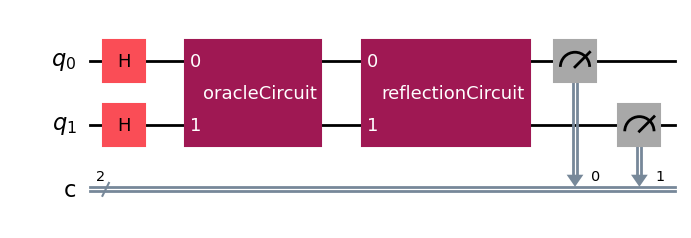

In [ ]:
mainCircuit.append(reflectionCircuit, [0, 1])
mainCircuit.measure([0, 1], [0, 1])
mainCircuit.draw(output='mpl')

## Step 5: Run Simulation

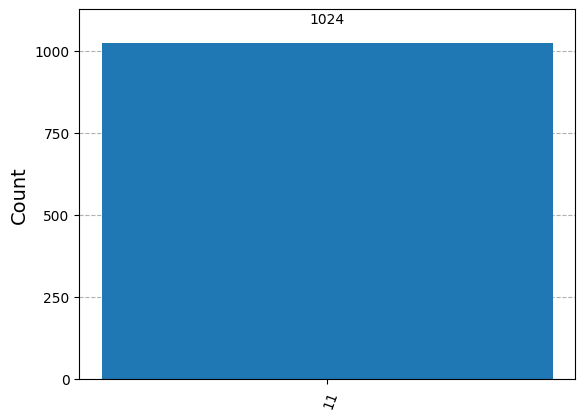

In [ ]:
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Create the Aer simulator backend
simulator = AerSimulator()

# Transpile your circuit for this backend
compiled_circuit = transpile(mainCircuit, simulator)

# Run the transpiled circuit
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()

# Extract and visualize results
counts = result.get_counts()
plot_histogram(counts)


## Summary

Grover’s Algorithm enables searching through an unsorted database quadratically faster than any classical approach.

In this 2-qubit demonstration, we successfully identified the marked state |11⟩ through quantum interference and amplitude amplification.

The same principle scales to larger qubit systems — where additional iterations further increase the probability of finding the correct result.